In [2]:
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(notebook_dir, '..'))

from package.bd_classes import *
from package.my_style_classes import *
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


### Análise do Modelo KNN

#### 1. Acurácia Geral
   - O modelo KNN alcançou uma acurácia geral de 93%, indicando que 93% das previsões do modelo estão corretas. Isso é um bom indicativo, mas é importante considerar a distribuição desigual entre as classes.

#### 2. Desempenho por Classe
   - **Classe "BRASILEIRA":**
      - Precision: 95%
      - Recall: 96%
      - F1-score: 96%
      - Support: 66137

   - **Classe "ESTRANGEIRA":**
      - Precision: 82%
      - Recall: 75%
      - F1-score: 78%
      - Support: 14390

   - É importante notar que a distribuição desigual dos dados, com um suporte muito maior para a classe "BRASILEIRA" (66137) em comparação com a classe "ESTRANGEIRA" (14390), pode ter influenciado essas métricas. O desequilíbrio nas classes pode tornar o modelo mais propenso a favorecer a classe majoritária em suas previsões.

#### 3. Desequilíbrio nas Classes
   - É crucial notar o desequilíbrio entre as classes, com um suporte muito maior para a classe "BRASILEIRA" (66137) em comparação com a classe "ESTRANGEIRA" (14390). Esse desequilíbrio pode impactar as métricas, especialmente para a classe majoritária.

#### 4. Média Macro e Média Ponderada
   - A média macro (macro avg) e a média ponderada (weighted avg) das métricas fornecem uma visão geral do desempenho do modelo, considerando o desequilíbrio entre as classes. A média macro mostra um valor de cerca de 0.87, indicando uma avaliação equitativa das classes em termos de desempenho.

#### 5. Considerações Finais
   - O modelo KNN parece ter um desempenho geral sólido, com destaque para a classe majoritária "BRASILEIRA". No entanto, é importante considerar estratégias adicionais para lidar com o desequilíbrio nas classes, como técnicas de reamostragem ou ajustes nos hiperparâmetros do modelo.

Ao interpretar essas métricas, é fundamental ter uma compreensão completa do contexto do problema e considerar as metas específicas do projeto. Essa análise fornecerá insights valiosos para aprimorar ainda mais o desempenho do modelo, se necessário.


In [3]:
con_correlation = Consume_bd()

columns = ['empresa_nacionalidade','ano', 'mes', 'passageiros_pagos', 'passageiros_gratis', 'carga_paga_kg', 'carga_gratis_kg', 'correio_kg', 'ask', 'rpk', 'atk', 'rtk', 'combustivel_litros', 'distancia_voada_km', 'decolagens', 'carga_paga_km', 'carga_gratis_km', 'correio_km', 'assentos', 'payload', 'horas_voadas', 'bagagem_kg']

columns_str = ', '.join(columns)

query_knn = con_correlation.make_query(f"""
    SELECT {columns_str}
    FROM voo
""")



df_knn = pd.DataFrame(data=query_knn, columns=columns)

In [4]:
X = df_knn.loc[:, df_knn.columns != 'empresa_nacionalidade']  
y = df_knn['empresa_nacionalidade']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [5]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

  BRASILEIRA       0.95      0.96      0.95     66219
 ESTRANGEIRA       0.81      0.75      0.78     14308

    accuracy                           0.93     80527
   macro avg       0.88      0.86      0.87     80527
weighted avg       0.92      0.93      0.92     80527



In [6]:
df_tes_knn = X_test.copy()

df_tes_knn['y_test'] = y_test
df_tes_knn['y_pred'] = y_pred
df_tes_knn['Acerto'] = df_tes_knn['y_pred'] == df_tes_knn['y_test']

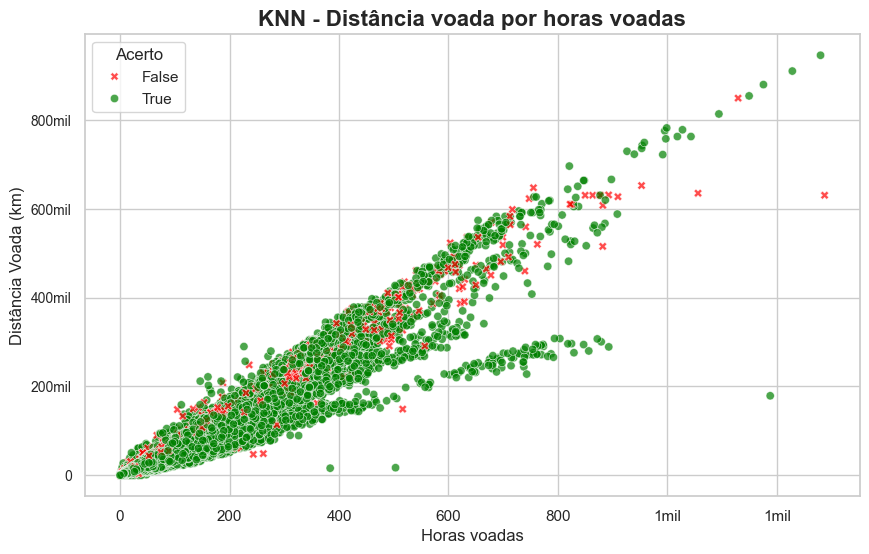

In [7]:
dic_knn_scartter = {
    'grafico':{'data':df_tes_knn,
               'x':'horas_voadas',
               'y':'distancia_voada_km',
               'palette':{True: 'green', False: 'red'},
               'style':'Acerto',
               'markers':{True: 'o', False: 'X'},
               'hue':'Acerto'},
    "eixos": {"xlabel": "Horas voadas",
              "ylabel": "Distância Voada (km)"},
    "titulo": {"label":"KNN - Distância voada por horas voadas"}
}

knn_scartterplot = My_scatterplot(**dic_knn_scartter)
knn_scartterplot.make()

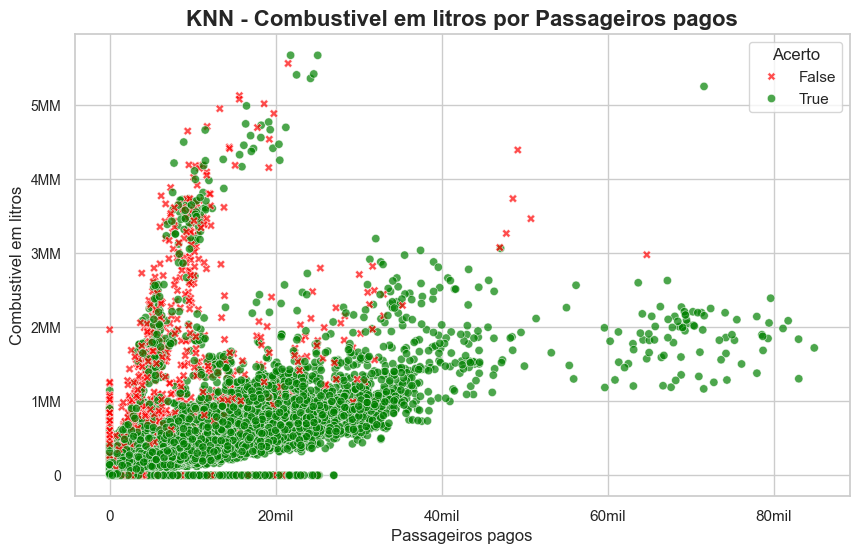

In [8]:
dic_knn_scartter2 = {
    'grafico':{'data':df_tes_knn,
               'x':'passageiros_pagos',
               'y':'combustivel_litros',
               'palette':{True: 'green', False: 'red'},
               'style':'Acerto', 
               'markers':{True: 'o', False: 'X'},
               'hue':'Acerto'},
    "eixos": {"xlabel": "Passageiros pagos",
              "ylabel": "Combustivel em litros"
    },
    "titulo":{"label":"KNN - Combustivel em litros por Passageiros pagos"}
}

knn_scartterplot2 = My_scatterplot(**dic_knn_scartter2)
knn_scartterplot2.make()